### ANOVA(분산 분석)

분산 분석은 말 그대로 분산을 분석하는 방법론이다. 분산이란 데이터가 예상(평균)과 다른 정도를 표현한 값으로, (개별값 - 평균)<sup>2</sup>을 합한 뒤, 자료 개수로 나눈 값이다.

> ex. 시장 조사를 위해 분식집의 떡볶이 가격을 조사한다. <br>
A지역과 B지역 중 임의로 5개의 지점을 들려 떡볶이의 가격을 조사했다. <br>
그 결과 A지역은 [2000, 1500, 3000, 3400, 5000]이고 <br>
B지역은 [3000, 3000, 3300, 2800, 2900]이었다.

위 조사 결과를 토대로 A지역의 떡볶이 가격이 더 예측이 어렵다(=분산이 크다)는 것을 알 수 있다.

### 분산 분석의 목적
분산분석의 목적은 떡볶이 가격의 예측이 빗나가는 문제에서 "지역"이 유의미한 영향을 미치는지 알아보는 것이다.

통계적으로, 전체 분산 내에서 집단내, 집단간, 중 어느 쪽의 영향력이 큰지 검정하는 것이 분산분석의 핵심이다.

### 분산 분석의 종류
- 하나의 큰 요인을 본다(일원, One-Way ANOVA)
- 두 개의 요인을 본다 + 두 요인이 서로 영향을 주는지도 파악한다 (이원, Two-Way ANOVA)
- ANCOVA(공분산 분석)

### T-test vs ANOVA

<div align=center><img src="./image_for_markdown/1.PNG"></div>

- one-way anova나 t-test나 하나의 요인으로 집단간 차이를 본다면 같은 것이 아니냐라고 할 수 있지만, ANOVA는 3그룹 이상의 차이를 확인할 수 있다는 장점이 있다.
- t-test를 그럼 여러번 돌리면 비슷해지지 않는가 라고 한다면, 같은 테스트를 반복할 때 마다 누적되는 오류를 줄일 수 있는 장점이 있다.

### t-dist, F-dist
이렇게 t-test와 유사하지만 확장된 논리를 가지고 있기에 ANOVA에서는 t-dist대신 F-dist를 사용한다.

### 일원 분산 분석의 가정
- 귀무가설 : 집단에 따른 차이가 존재하지 않는다.
- 대립가설 : 집단 중 적어도 하나의 집단은 차이가 난다. = 집단 중 최소 한 쌍의 집단은 차이가 존재한다.

In [1]:
import pandas as pd

sati = pd.read_csv("./Data/sati.csv")
sati.head()

,Color,Satisfaction,ID
0,Black,0.9,ID_1
1,Red,2.3,ID_2
2,White,2.9,ID_3
3,Black,1.7,ID_4
4,White,3.2,ID_5


In [3]:
sati.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Satisfaction,90.000000,2.224444,0.851477,0.700000,1.500000,2.200000,2.900000,4.300000


In [4]:
sati["Color"].value_counts()

Color
Black    30
Red      30
White    30
Name: count, dtype: int64

일원 분산분석의 경우, 그룹별 값의 분산을 비교해야 하기에 카테고리별로 데이터의 특징을 파악하는 것이 중요하다.

In [22]:
colors = sati["Color"].unique().tolist()
for color in colors:
    print(f"{color}'s describe : \n {sati.loc[sati['Color'] == color].describe()}\n")

Black's describe : 
        Satisfaction
count     30.000000
mean       1.720000
std        0.577987
min        0.700000
25%        1.225000
50%        1.700000
75%        2.200000
max        2.600000

Red's describe : 
        Satisfaction
count      30.00000
mean        1.76000
std         0.49032
min         0.80000
25%         1.50000
50%         1.70000
75%         2.05000
max         2.90000

White's describe : 
        Satisfaction
count     30.000000
mean       3.193333
std        0.439383
min        2.300000
25%        2.900000
50%        3.150000
75%        3.400000
max        4.300000



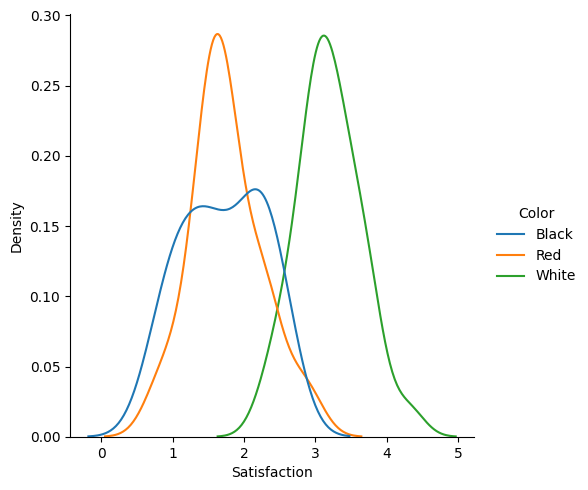

In [7]:
import seaborn as sns

sns.displot(data=sati, x="Satisfaction", hue="Color", kind="kde")

흰색을 제외한 색의 만족도가 얼추 유사한 것을 확인할 수 있고, 검은색을 제외한 상품들은 정규분포의 형태를 띠는 것을 확인할 수 있다.

In [23]:
import pingouin as pg

group_per_color = []
for color in colors:
    group_per_color.append(list(sati[sati["Color"] == color]["Satisfaction"]))

In [25]:
for i, group in enumerate(group_per_color):
    print(f"{colors[i]}'s normality : \n{pg.normality(group)}\n")    

Black's normality : 
          W      pval  normal
0  0.947147  0.141719    True

Red's normality : 
          W      pval  normal
0  0.959755  0.305335    True

White's normality : 
          W      pval  normal
0  0.981829  0.871821    True



세 그룹 모두 p-value가 0.05가 넘기에 정규성은 이루고 있다.

### 등분산 검정
등분산 검정은 각 집단의 분산이 같은지 확인하는 과정이다. 이 조건을 만족하지 못하는 경우, 다른 방식의 ANOVA(Welch의 검정)를 사용한다.

크게 Levene과 Bartlett의 방식 두 가지가 존재한다.

일반적으로 전자가 등분산이 덜 민감하지만, 정규성 조건을 만족한 데이터라면 후자를 더 추천한다.

In [26]:
# Levene 검정
pg.homoscedasticity(sati, dv="Satisfaction", group="Color")

,W,pval,equal_var
levene,2.331633,0.103179,True


In [27]:
# Bartlett 검정
pg.homoscedasticity(group_per_color, method="bartlett", alpha=.05)

,T,pval,equal_var
bartlett,2.200404,0.332804,True


검정을 수행한 결과, 두 검정 모두 동등한 분산인 것을 확인했다.

### ANOVA 검정

In [28]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols("Satisfaction ~ Color", sati).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Color,2.0,42.267556,21.133778,82.603271,7.810636e-21
Residual,87.0,22.258667,0.255847,NaN,NaN


### ANOVA 모형의 해석
ANOVA모형은 기본적으로 분산의 비율로 검정을 수행한다. 모형이 리턴한 결과를 확인해보자.

1. 검정결과(F값)
    - 분석결과는 F(2, 87) = 82.603 과 같다.
    - F안에는 자유도(df, degrees of freedom)이 들어가며 비교 대상이 (집단내 vs 집단간)이기 때문에 자유도가 2개 들어간다.
    - F값과 자유도 각각의 위치는 df열의 각 값이다.
    - 이렇게 제시한 F값 검정의 결과는 p < 0.05와 같기에(PR(>F)열 값) 통계가 유의하다고 볼 수 있다.

2. 분산의 합과 비율
    - 이러한 F값은 어디서 온 것인가? 
    - 계속 언급했듯, **분산의 비율**을 기반으로 검정을 수행한다.
    - 결국 F값은, mean_sq의 두 값, 즉 $21.133\over 0.255$ 를 계산한 결과인 것이다.

이제 우리는 ANOVA결과 F값과 통계적 유의성(귀무가설 기각, 대립가설 채택)을 확인할 수 있게 되었다.

하지만, 아직 ANOVA를 통해 확인하려는 사실(해석)이 남아있다.

### 사후검정(Post Hoc)로 ANOVA 해석하기
p-value가 0.05보다 작기 때문에 다음과 같이 검정 결과를 이해할 수 있다.

<del>귀무가설 : 집단에 따른 차이가 존재하지 않는다</del> $\rarr$ 기각 <br>
대립가설 : 집단 중 적어도 하나의 집단은 차이가 날 것이다. = 집단 중 최소 한 쌍의 집단은 차이가 존재한다. $\rarr$ 채택

하지만 여기서 "적어도 하나의 집단" 혹은 "최소 한 쌍"은 어떻게 검증해야하는가?

우리가 검증한 내용은 "모든 집단의 비교 중에서 적어도 하나는 다를 것이다" 이지 "모든 집단이 다르다" 혹은 "특정 집단만 다르다" 가 아니다.

즉, "모든 집단을 한 번씩 다 비교해야" 검증 과정이 마무리되는 것이다.

이것을 사후검정이라 부른다.

### 사후검정의 논리
사후검정은 t-test를 반복하는 것에서 오류를 보정하는 과정을 거친 방식이다. 다양한 방식들 중 가장 유명한 방식은 Tukey의 방식이다.

조금 더 강력한 검정 방식으로는 Bonferroni의 방식이 있지만 일반적으로는 Tukey의 방식을 많이 채택한다.

In [32]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(endog=sati["Satisfaction"], groups=sati["Color"], alpha=0.05)
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Black,Red,0.04,0.9496,-0.2714,0.3514,False
Black,White,1.4733,0.0,1.1619,1.7847,True
Red,White,1.4333,0.0,1.1219,1.7447,True


해석하는 방법으로는, 귀무가설을 reject(기각)할 때, 차이가 유의하기 때문에 reject컬럼에서 True가 나오는 조합이 차이가 나는 집단이다.

meandiff 컬럼은 얼마나 (평균) 차이가 나는지를 보여준다고 해석하면 된다.

간단히 말해서, 세 쌍의 비교에서 각각 meandiff만큼의 차이를 보이지만, 통계적으로 "다르다"라고 말할 수 있는 조합은 아래 두 조합이다.

> Black~White Red~White 집단이 유의한 차이가 나는 집단이고 Black-Red 집단은 차이가 나지 않음을 확인했다.

### 이원 분산분석
일원 분산분석이 하나의 효과에 의해 결과값이 영향을 받았는지 살펴본다면, 이원 분산분석은 두 개의 효과가 작용했는지 알아보는 검정이다.

얼핏 듣기에는 딱히 차이가 없다고 생각하지만, 함정이 있다. 효과가 하나 더 늘어남으로서 우리는 상호작용효과(Interaction Effect)를 고려해야한다.

> ex. 커피 프랜차이즈를 운영하는 과정에서 일일 평균 손님 수 조사를 한다고 가정하자. <br>
일반적으로 *지역*이 주요한 매출 차이의 원인이 되겠지만, 그 외도로  *건물 유형*과 같은 요인이 존재할 수 있다. <br>
두 개 이상의 효과를 측정할 때, 단순한 합인 "A지역이 더 손님 수가 많다 + ~유형의 건물에서 손님 수가 많다"으로만 평가하는 것과, <br>
"A지역에서는 ~건물 유형에서 장사하는 것이 손님 수가 많다"와 같은 상호작용을 고려하는 것이 더 정확할까?

아주 특별한 경우가 아니라면 상호작용을 보는 것이 중요하다. 실제로 우리 주변에는 하나의 효과가 아닌 두 개 이상의 상호작용이 영향을 주는 사건들이 많다.

### 이원 분산분석의 가설 설정
- A라는 요인이 유의한가? (대립가설 : A라는 요인에 따라 결과값 평균이 달라질 것이다 / 귀무가설 : A라는 요인에 따른 결과값 평균은 차이가 없을 것이다.)
- B라는 요인이 유의한가? (대립가설 : B라는 요인에 따라 결과값 평균이 달라질 것이다 / 귀무가설 : B라는 요인에 따른 결과값 평균은 차이가 없을 것이다.)
- A와 B를 상호작용한 것이 유의한가? (대립가설 : A요인 별 결과값 평균은 B에 따라 달라질 것이다. / 귀무가설 : A요인 별 결과값 평균은 B에 따라 달라지지 않을 것이다.)

### 이원 분산 분석의 접근법
이원 분산 분석의 경우 일반적으로 두 개의 모델을 검증하는 방식으로 통계 분석을 수행한다.

1. A와 B가 유의하지만, A&B가 유의하지는 않다는 가설의 모델
2. A와 B, A&B 모두 유의한 가설의 모델
